In [1]:
! pip install tensorflow opencv-python mediapipe scikit-learn matplotlib tensorflowjs

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR-CONVERSION BGR-to-RGB
    image.flags.writeable = False                  # Convert image to not-writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Convert image to writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR-COVERSION RGB-to-BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame,results)

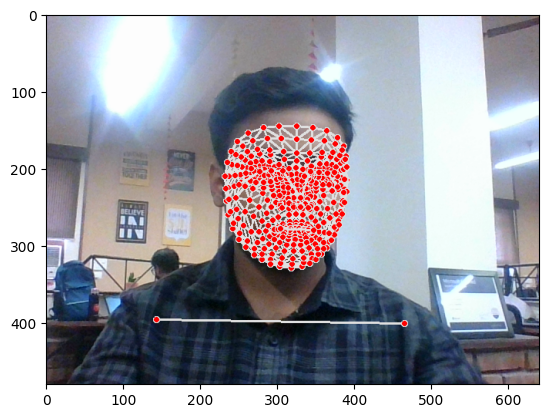

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

<3> Extract Key Point Values

In [11]:
draw_landmarks(frame, results)

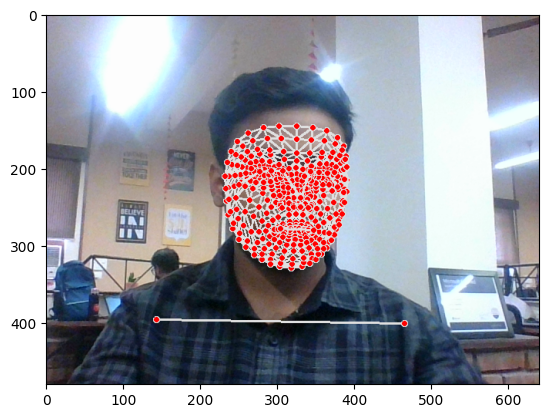

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

########setting up folders

In [14]:
DATA_PATH=os.path.join('MP_Data')
actions=np.array(['hello','thanks','sorry','bye'])
no_sequences=20
sequence_length=20
start_folder=20

In [15]:
#for action in actions:
 #   for sequence in range(no_sequences):
  #      try:
   #         os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
    #    except:
     #       pass    

In [16]:
#cap=cv2.VideoCapture(0)
#set mediapipe model
#with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
 #   for action in actions:
  #      for sequence in range(no_sequences):
   #         for frame_num in range(sequence_length):
    #            ret,frame=cap.read()
     #   
      #          #make detections
       #         image,results=mediapipe_detection(frame,holistic)
        #        
         #       #draw landmarksq
               # draw_styled_landmarks(image,results)
                
               # if frame_num==0:
               #     cv2.putText(image,'STARTING COLLECTION',(120,200),
                #                cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
               #     cv2.putText(image,'collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                #                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),4,cv2.LINE_AA)
               #     cv2.imshow('openCV Feed',image)
              #      cv2.waitKey(2000)
             #   
            #    else:
           #         cv2.putText(image,'collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
          #                      cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),4,cv2.LINE_AA)
         #           cv2.imshow('openCV Feed',image)
        #            
       #         keypoints=extract_keypoints(results)
      #          npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num)) 
     #           np.save(npy_path,keypoints)   
    #            
   #             
  #              if cv2.waitKey(10) & 0xFF == ord('q'):#destroy/break out gracefully
  #                  break
 #  cap.release()
#    cv2.destroyAllWindows()    

In [17]:
cap.release()
cv2.destroyAllWindows()

####preprocess data and create labels and features

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # type: ignore

In [19]:
label_map={label:num for num,label in enumerate(actions)}

In [20]:
label_map

{'hello': 0, 'thanks': 1, 'sorry': 2, 'bye': 3}

In [21]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [22]:
X=np.array(sequences)

In [23]:
y=to_categorical(labels).astype(int)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

Build and train LSTM Neural Network

In [25]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM,Dense # type: ignore
from tensorflow.keras.callbacks import TensorBoard # type: ignore

In [26]:
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [27]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/200


3/3 [==============================] - 9s 235ms/step - loss: 1.4151 - categorical_accuracy: 0.2632
Epoch 2/200
3/3 [==============================] - 0s 159ms/step - loss: 1.5553 - categorical_accuracy: 0.3158
Epoch 3/200
3/3 [==============================] - 0s 157ms/step - loss: 1.9077 - categorical_accuracy: 0.2895
Epoch 4/200
3/3 [==============================] - 0s 126ms/step - loss: 1.4453 - categorical_accuracy: 0.2368
Epoch 5/200
3/3 [==============================] - 0s 133ms/step - loss: 1.4113 - categorical_accuracy: 0.3158
Epoch 6/200
3/3 [==============================] - 0s 116ms/step - loss: 1.3822 - categorical_accuracy: 0.2632
Epoch 7/200
3/3 [==============================] - 0s 117ms/step - loss: 1.4323 - categorical_accuracy: 0.2895
Epoch 8/200
3/3 [==============================] - 0s 125ms/step - loss: 1.3570 - categorical_accuracy: 0.2632
Epoch 9/200
3/3 [==============================] - 0s 139ms/step - loss: 1.7418 - categorical_accuracy: 0.2500

Make predictions

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 20, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596708 (2.28 MB)
Trainable params: 596708 

In [31]:
res = model.predict(X_test)

1/1 [==============================] - 1s 928ms/step


In [32]:
actions[np.argmax(res[0])]

'sorry'

In [33]:
actions[np.argmax(y_test[0])]

'sorry'

save weights

In [34]:
model.save('./model.h5')
model.save_weights('./model_weights.h5')

c:\Users\shubh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
del model

In [36]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')

In [37]:
model.load_weights('model_weights.h5')

Evaluation using confusion matrix and accuracy

In [38]:
from sklearn.metrics import  multilabel_confusion_matrix,accuracy_score

In [39]:
yhat = model.predict(X_test)

1/1 [==============================] - 1s 721ms/step


In [40]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [41]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 2],
        [0, 0]],

       [[3, 1],
        [0, 0]],

       [[3, 0],
        [0, 1]],

       [[1, 0],
        [3, 0]]], dtype=int64)

In [42]:
accuracy_score(ytrue,yhat)

0.25

Testing

In [43]:
from scipy import stats

In [44]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [45]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: list index out of range

: 